In [196]:
from PIL import Image
import numpy as np
img = Image.open('img.png')
img = img.convert('RGBA')
width, height = img.size

## Shear the image horizontal and vertical

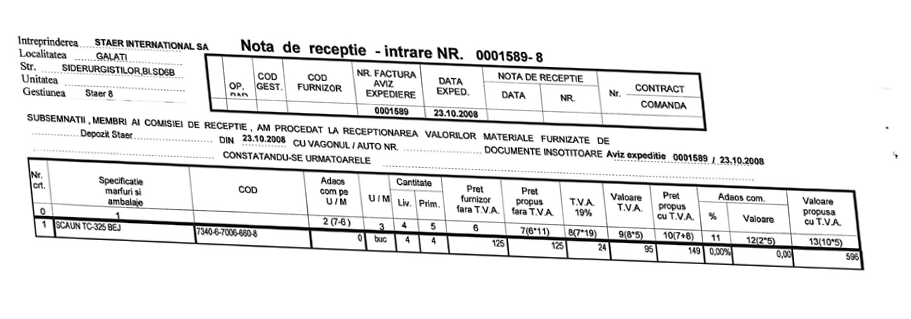

In [197]:
hor_amount = -0.1
ver_amount = -0.04

hor_shift = int(round(abs(hor_amount) * height))
ver_shift = int(round(abs(ver_amount) * width))

#ax + by + c = x`
a = 1
b = hor_amount
c = 0

#dx + ey + f = y`
d = ver_amount
e = 1
f = 0

img = img.transform((width + hor_shift, height + ver_shift), 
                    Image.AFFINE, (a,b,c,d,e,f), Image.BICUBIC)


fff = Image.new('RGBA', img.size, (255,)*4)
out = Image.composite(img, fff, img)
out.convert(img.mode)

In [85]:
def vFunc(x, c, s, tan):
    d = s - abs(x - c)
    if d < 0:
        return 0
    return int(round(tan * d))        

## Generate random distorsions

In [235]:
import random

max_distorsions = 6
min_spread = 30
max_spread = 60
min_tan = 0.3
max_tan = 0.5

distorsions = []

nr = np.random.uniform(0,1,random.randint(1, max_distorsions)) * 1000

for n in nr:
    distorsions.append((int(n), random.randint(min_spread, max_spread), random.uniform(min_tan, max_tan)))

[(850, 34, 0.3307755810338169), (844, 53, 0.30688852230715147), (356, 40, 0.30552165140852006), (141, 51, 0.4921852340584023), (621, 48, 0.44045276348000423)]


## Apply distorsion to image

In [237]:
work_size = (1000, 1000)

orig_size = out.size
final = out.copy().resize(work_size, Image.LANCZOS)
pix = final.load()

for i in range(0,final.width):
    for j in range(0, final.height):
        newJ = j
        for distorsion in distorsions:
            if abs(distorsion[0] - i) < distorsion[1]:
                newJ += vFunc(*(i,*distorsion))
        if newJ < final.height:
            pix[i,j] = pix[i,newJ]
            
final = final.resize(orig_size, Image.LANCZOS)

final.save('result.png')